In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tarfile
my_tar = tarfile.open('/content/drive/MyDrive/CS893 Sp2022 A2 Dataset/train_and_val_set.tar')
my_tar.extractall('./train_data') # specify which folder to extract to
my_tar.close()

In [5]:
import tarfile
my_tar = tarfile.open('/content/drive/MyDrive/CS893 Sp2022 A2 Dataset/test_set.tar')
my_tar.extractall('./test_data') # specify which folder to extract to
my_tar.close()

In [6]:
pip install pretrainedmodels

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=513b6b76730cdd31f59a2227b9b6cae18c838dd5eed1933667e89abaadba4a79
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built pretrainedmodels


In [7]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Assignment2/')

In [8]:

import torch.nn as nn
import torch.nn.functional as F
import pretrainedmodels
import torchvision
from torchsummary import summary
import torch
import pandas as pd
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np

**Importing Function from Respective files**

In [9]:
from Dataset import CustomDataset
from model import MultiHeadResNet50, MultiHeadInceptionV3
from loss import loss_fn
from utils import save_loss_plot,ShowImage,show_batch,classfied_images,misclassfied_images
from traintest import train,test,validate
from metrics import classification_metrics, regression_metrcis

**Prepare Model**

In [10]:
#preparame model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# initialize the model
model = MultiHeadResNet50(pretrained=True, requires_grad=True).to(device)
#model = MultiHeadInceptionV3(pretrained=True, requires_grad=True).to(device)
# learning parameters
lr = 0.01
optimizer = optim.Adam(params=model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
criterion = loss_fn
batch_size = 256
epochs = 7
summary(model, (3,224, 224))


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

**Loading training and Validation set**

In [11]:
img_path="/content/train_data/train_set/images/"
lbl_path="/content/train_data/train_set/annotations/"

img_size=(224,224) ## for incetiponV3 change size to (299,299)
full_dataset=CustomDataset(img_path,lbl_path,img_size,True)
print("Total samples:",len(full_dataset))
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

Total samples: 287651


**Creating DataLoaders**

In [12]:
from collections import Counter
val_classes = [int(full_dataset.label[i]) for i in val_dataset.indices]
vc=dict(Counter(val_classes))
# print(vc)
val_sample_count=[vc[0],vc[1],vc[2],vc[3],vc[4],vc[5],vc[6],vc[7]]
# print(val_sample_count)
val_loader = DataLoader(
    val_dataset, batch_size=256, num_workers=4)

In [13]:

train_classes = [int(full_dataset.label[i]) for i in train_dataset.indices]
tc=dict(Counter(train_classes))
sample_count=[tc[0],tc[1],tc[2],tc[3],tc[4],tc[5],tc[6],tc[7]]
#print(sample_count)
train_loader = DataLoader(
    train_dataset, batch_size=256, num_workers=4)


In [6]:
t_path1="/content/test_data/val_set/images/"
t_path2="/content/test_data/val_set/annotations/"
img_size=(224,224)
from torch.utils.data import WeightedRandomSampler,DataLoader
test_dataset=CustomDataset(t_path1,t_path2,img_size,False)
test_dataloader = DataLoader(
    test_dataset, batch_size=256, num_workers=4)

**Dispaly Training Samples**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

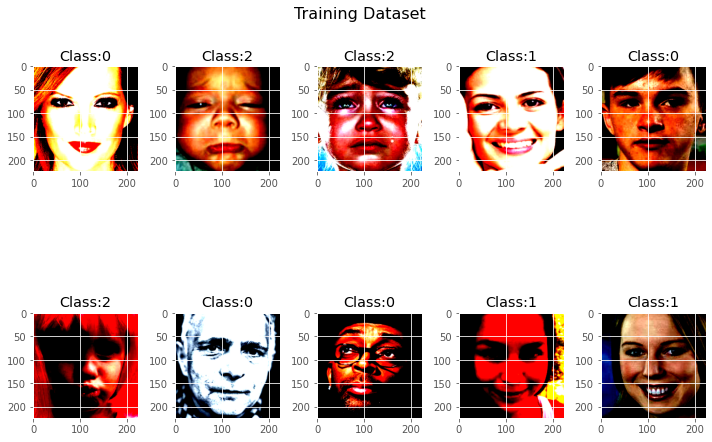

In [14]:
show_batch(train_loader)

**Weights for CrossEntropy Loss Function**

In [15]:
total_Sample=[]
weight=[]
for i in range(0, len(sample_count)): 
	total_Sample.append(sample_count[i] + val_sample_count[i])
for i in range(0, len(	total_Sample)):
  weight.append(sum(total_Sample)/total_Sample[i]) 
weights = torch.tensor(weight).to(device)

### For testing use these weights
# weights= [ 3.8418,  2.1400, 11.2986, 20.4153, 45.1005, 75.6379, 11.5606, 76.7069]
# weights = torch.tensor(weights).to(device)

**Train and Validate Model**

In [18]:
import numpy as np
train_loss, val_loss,train_acc,val_acc = [], [],[],[]
valid_loss_min=np.Inf
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss,train_epoch_acc,pred,target = train(
        model, train_loader, optimizer, loss_fn, train_dataset, device,weights
    )
    val_epoch_loss,val_epoch_acc = validate(
        model, val_loader, loss_fn, val_dataset, device,weights
    )
    scheduler.step()

    train_loss.append(train_epoch_loss)
    train_acc.append(train_epoch_acc)
    val_loss.append(val_epoch_loss)
    val_acc.append(val_epoch_acc)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f" train acc: {train_epoch_acc:.4f}")
    print(f"Validation Loss: {val_epoch_loss:.4f}")
    print(f"Validation acc: {val_epoch_acc:.4f}")
 

    if val_epoch_loss < valid_loss_min:
        torch.save(model, 'model.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        val_epoch_loss))
        valid_loss_min = val_epoch_loss
    
# save the model to disk
#save_model(epochs, model, optimizer, criterion)
# save the training and validation loss plot to disk
#save_loss_plot(train_loss, val_loss)

Epoch 1 of 10


  1%|          | 8/899.0 [00:07<14:00,  1.06it/s]


KeyboardInterrupt: ignored

**Loading and Testing of trained model**

In [8]:
## path where the model is stored
path='/content/drive/MyDrive/ColabNotebooks/assignment/outputs/resnet50-55.pt'


In [9]:
model1=MultiHeadResNet50(pretrained=True,requires_grad=False)

In [10]:
checkpoint=torch.load(path,map_location='cpu')
model1.load_state_dict(checkpoint)
model1=model1.cuda()

In [11]:
test_epoch_acc,images,pred1,pred2,pred3,target1,target2,target3  = test(
        model1, test_dataloader, loss_fn, test_dataset, device,weights)
print(f" test acc: {test_epoch_acc:.4f}")

16it [00:10,  1.56it/s]

 test acc: 0.5561


**Classification Results**

In [12]:
classification_metrics(target1,pred1)

Accuracy 0.5561390347586896
f1_score 0.5553639866968979
              precision    recall  f1-score   support

           0       0.42      0.51      0.46       500
           1       0.67      0.78      0.72       500
           2       0.60      0.52      0.56       500
           3       0.54      0.52      0.53       500
           4       0.59      0.60      0.60       500
           5       0.58      0.49      0.53       500
           6       0.54      0.49      0.51       500
           7       0.52      0.54      0.53       499

    accuracy                           0.56      3999
   macro avg       0.56      0.56      0.56      3999
weighted avg       0.56      0.56      0.56      3999

[[254  16  44  43  12  16  30  85]
 [ 19 388   3  18   1  11   2  58]
 [ 83  11 260  20  29  31  41  25]
 [ 55  41  14 262  85  16   9  18]
 [ 28  10  28  83 300  22  24   5]
 [ 34  25  39  15  40 247  73  27]
 [ 65   7  37  26  31  62 244  28]
 [ 71  81  11  14   7  19  27 269]]
Alpha: 0.492

**Valence Results** 

In [15]:
print("Metrics values for Valence")
regression_metrcis(np.asarray(target2),np.asarray(pred2))

Metrics values for Valence
RMSE 0.4459871
CCC 0.48829778408656843
SAGR 0.6856714178544636
Corelation 0.5571429566927077


**Arousal Results**

In [ ]:
print("Metrics values for arousal")
regression_metrcis(np.asarray(target2),np.asarray(pred2))

**Correcly Classified Images**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

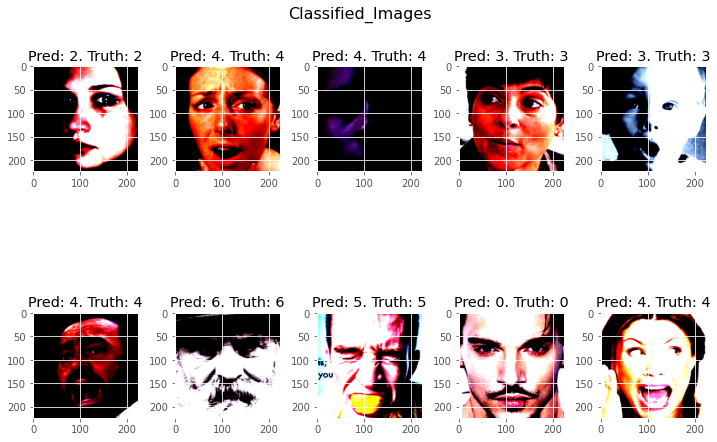

In [16]:
img,pred_lbl,act_lbl=classfied_images(images,target1,pred1)
ShowImage(img,act_lbl,pred_lbl,1,1)

**Miss-classified Images**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

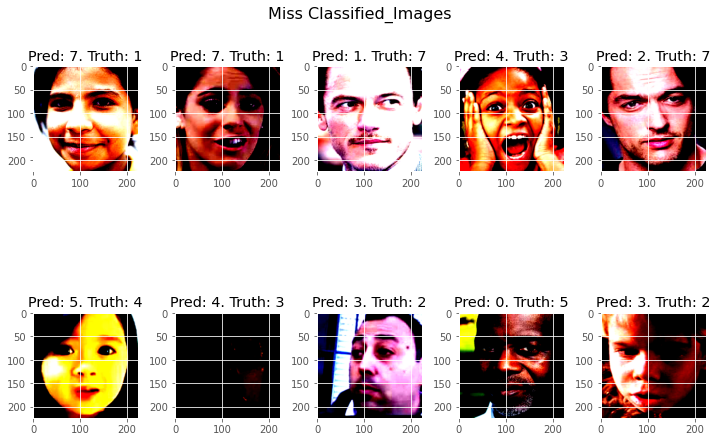

In [17]:
mis_img,pred_lbl,act_lbl=misclassfied_images(images,target1,pred1)
ShowImage(mis_img,pred_lbl,act_lbl,1,2)